In [1]:
# Jupyter Notebook to Test Coil_Combination Function
"""
Coil Combination for Hyperpolarized MRI data.

Parameters:
    Image_mc (ndarray): Multi-channel image data. Shape: [Nx, Ny, Nz, Ncoil, N_freq, Ndyn]
    cc_method (str): Coil combination method. One of:
                        - 'sos' : Sum of Squares
                        - 'svd' : Singular Value Decomposition
                        - 'refpeak' : Reference Peak
    prewhitening_flag (bool): If True, apply prewhitening using edge of image.

Returns:
    Image_cc (ndarray): Coil-combined image.
    Smap (ndarray or None): Sensitivity map, if available (None for 'sos' and 'svd').
"""

#  (c) 2017-2018 The Regents of the University of California
#  All Rights Reserved.

#  Written by :Parimal Joshi
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import SVD_cc
import prewhitening_cc 
import RefPeak_cc
import Sum_of_Square_cc

In [2]:
def coil_combination(Image_mc, cc_method='sos', prewhitening_flag=True):

    if prewhitening_flag:
        Image_mc, _ = prewhitening_cc.prewhitening_cc(Image_mc)

    Nx, Ny, Nz, Ncoil, N_freq, Ndyn = Image_mc.shape
    # print(Image_mc.shape)
    # Coil combination methods
    cc_method = cc_method.lower()
    if cc_method == 'sos':
        Image_cc = Sum_of_Square_cc.Sum_of_Square_cc(Image_mc)
        Smap = None
    elif cc_method == 'svd':
        Image_cc = SVD_cc.SVD_cc(Image_mc)
        Smap = None
    elif cc_method == 'refpeak':
        Image_cc, Smap = RefPeak_cc.ref_peak_cc(Image_mc)
    else:
        raise ValueError("Invalid cc_method. Choose from: 'sos', 'svd', 'refpeak'.")

    return Image_cc, Smap

Testing method 'sos'
	Output Image shape: (16, 18, 1, 1, 256)
	Smap is None


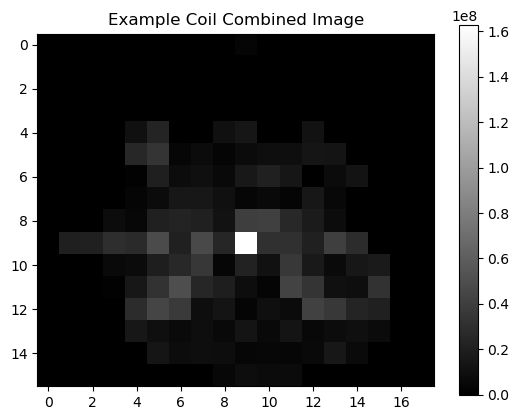

Testing method 'refpeak'
Auto select metabolite # 0 for RefPeak combination.
	Output Image shape: (16, 18, 1, 1, 256)
	Smap shape: (16, 18, 1, 16, 1)


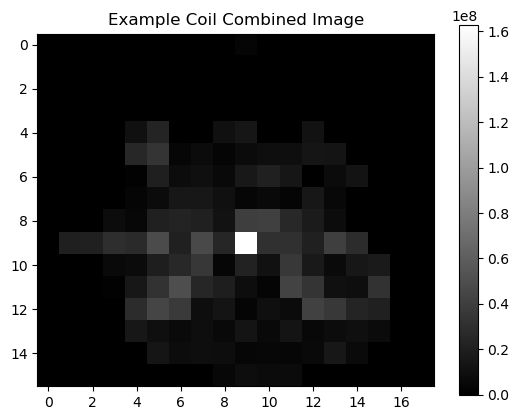

Testing method 'svd'
	Output Image shape: (16, 18, 1, 1, 256)
	Smap is None


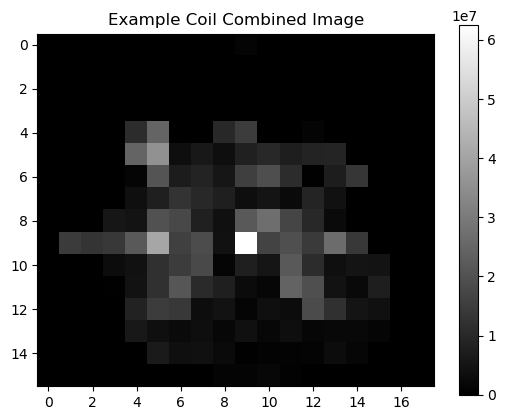

In [4]:
mat_file_path = '../coil_comb_test.mat' 
mat_data = sio.loadmat(mat_file_path)
Image_mc = mat_data['Image_mc']

for method in ['sos','refpeak','svd']: 
    print(f"Testing method '{method}'")
    Image_cc, Smap = coil_combination(Image_mc.copy(), cc_method=method, prewhitening_flag=True)
    print("\tOutput Image shape:", Image_cc.shape)
    if Smap is not None:
        print("\tSmap shape:", Smap.shape)
    else:
        print("\tSmap is None")

    plt.imshow(np.abs(Image_cc[:, :, 0, 0,0]), cmap='gray')
    plt.title('Example Coil Combined Image')
    plt.colorbar()
    plt.show()